# Análisis Comparativo de Audios: Música Clásica vs. Rock Alternativo

In [5]:
from pydub import AudioSegment
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np


En esta práctica se comparan dos piezas musicales de géneros distintos utilizando técnicas de análisis de audio mediante `librosa`.

- **Canción 1:** *Requiem* de Wolfgang Amadeus Mozart (música clásica)
- **Canción 2:** *Disco* de Surf Curse (rock alternativo / indie rock)

El objetivo es identificar y visualizar las diferencias en sus características acústicas usando formas de onda, coeficientes MFCC, espectrogramas y frecuencias dominantes.

In [2]:
# Cargar los archivos MP3
audio2 = AudioSegment.from_file("Disco.mp3")
audio1 = AudioSegment.from_file("Requiem.mp3")



In [3]:
# Exportarlos como WAV
audio1.export("Requiem.wav", format="wav")
audio2.export("Disco.wav", format="wav")

<_io.BufferedRandom name='Disco.wav'>

In [8]:
# Cargar audios
y1, sr1 = librosa.load("Requiem.wav")
y2, sr2 = librosa.load("Disco.wav")

## Forma de onda

La forma de onda representa cómo varía la amplitud de la señal a lo largo del tiempo. 

- En *Requiem*, observamos una señal con mayor variabilidad dinámica, reflejando los cambios propios de una obra orquestal con partes suaves y otras más intensas.
- En *Disco*, la onda es más constante y repetitiva, típica de una canción de ritmo más marcado y directo.


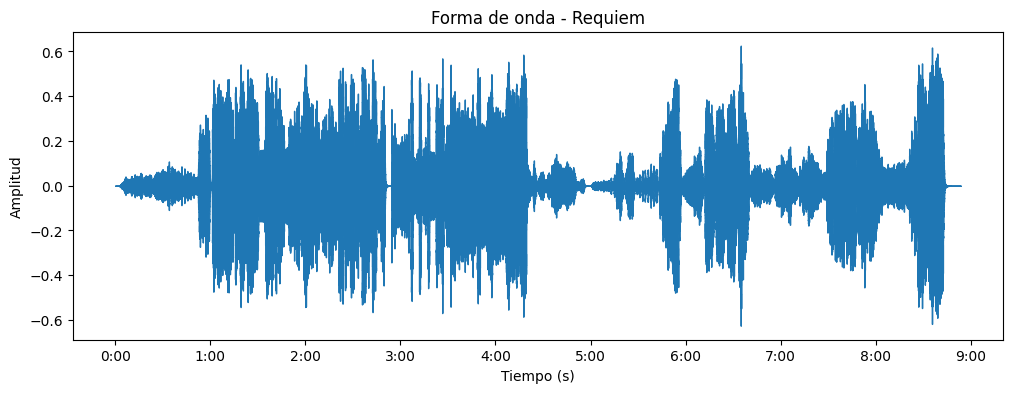

In [14]:
# Visualizar forma de onda
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y1, sr=sr1)
plt.title("Forma de onda - Requiem")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.savefig("Forma de onda - Requiem.png")
plt.show()



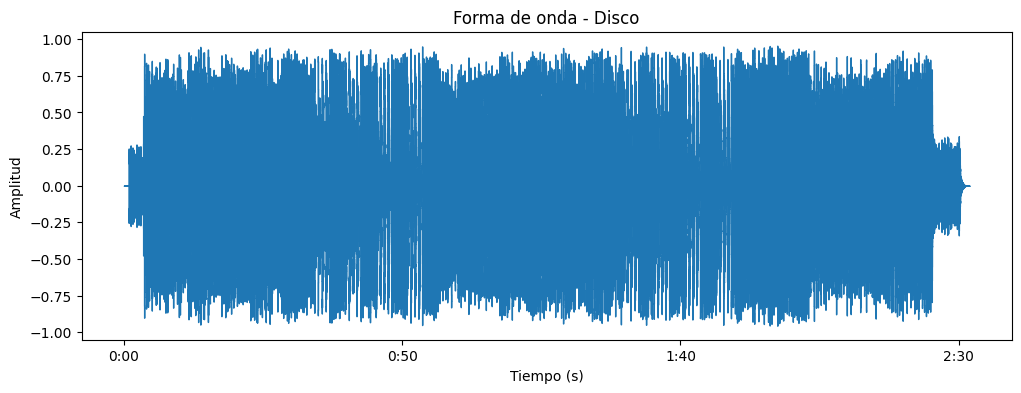

In [15]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y2, sr=sr2)
plt.title("Forma de onda - Disco")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.savefig("Forma de onda - Disco.png")
plt.show()



## Coeficientes MFCC

Los coeficientes MFCC (Mel-Frequency Cepstral Coefficients) permiten analizar la envolvente espectral de los sonidos, usada comúnmente en tareas de clasificación y reconocimiento de audio.

- *Requiem* presenta una mayor complejidad espectral, con patrones que reflejan instrumentos acústicos diversos y cambios tonales frecuentes.
- *Disco* muestra MFCCs más homogéneos, consistentes con un arreglo más simple y repetitivo, típico del rock alternativo.


In [16]:
# Calcular MFCCs
mfcc1 = librosa.feature.mfcc(y=y1, sr=sr1, n_mfcc=13)
mfcc2 = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=13)



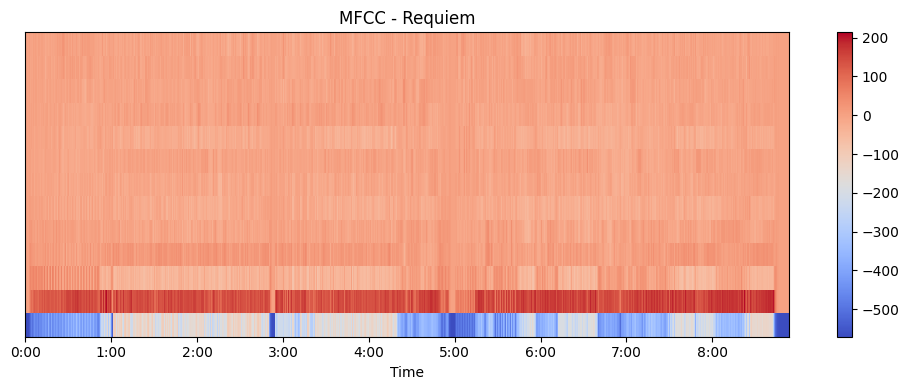

In [17]:
# Mostrar MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc1, x_axis='time', sr=sr1)
plt.colorbar()
plt.title('MFCC - Requiem')
plt.tight_layout()
plt.savefig("MFCC - Requiem.png")
plt.show()



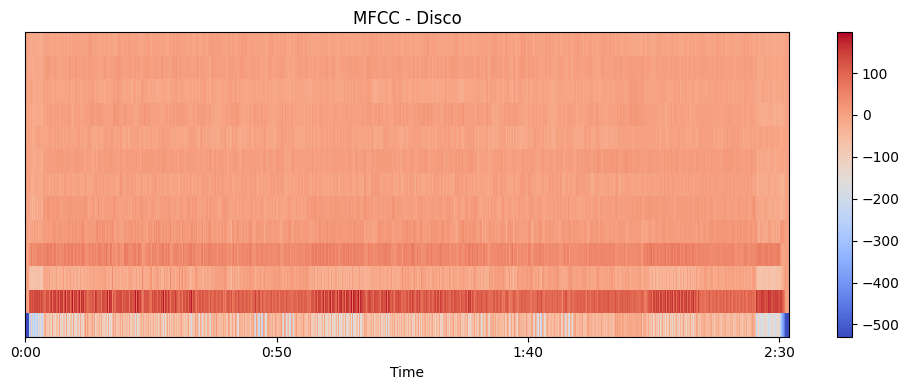

In [18]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc2, x_axis='time', sr=sr2)
plt.colorbar()
plt.title('MFCC - Disco')
plt.tight_layout()
plt.savefig('MFCC - Disco.png')
plt.show()

## Espectrograma

El espectrograma muestra cómo se distribuye la energía en distintas frecuencias a lo largo del tiempo.

- *Requiem* tiene una amplia cobertura de frecuencias, con actividad importante tanto en frecuencias bajas (graves) como en medias y altas, reflejando la riqueza armónica de una obra clásica.
- *Disco* tiene una energía más concentrada en la banda media, donde suelen ubicarse guitarras, bajo y voz.


In [19]:
# ESPECTROGRAMA - Requiem
S1 = librosa.stft(y1)
S1_db = librosa.amplitude_to_db(np.abs(S1), ref=np.max)




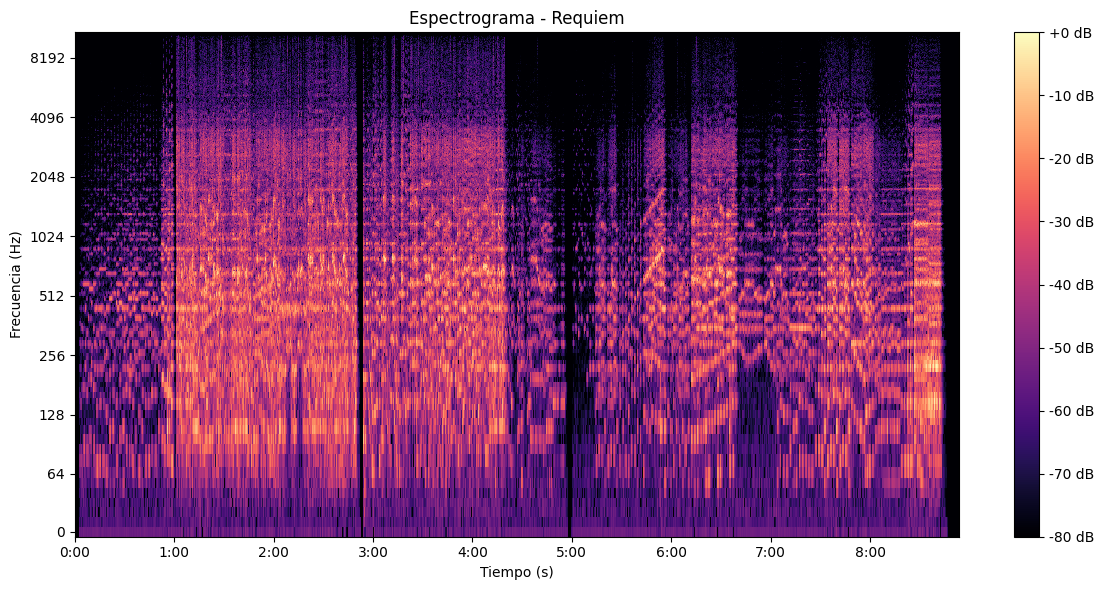

In [20]:
plt.figure(figsize=(12, 6))
librosa.display.specshow(S1_db, sr=sr1, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma - Requiem')
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.tight_layout()
plt.savefig("espectrograma_Requiem.png")
plt.show()

In [21]:
# ESPECTROGRAMA - Disco
S2 = librosa.stft(y2)
S2_db = librosa.amplitude_to_db(np.abs(S2), ref=np.max)


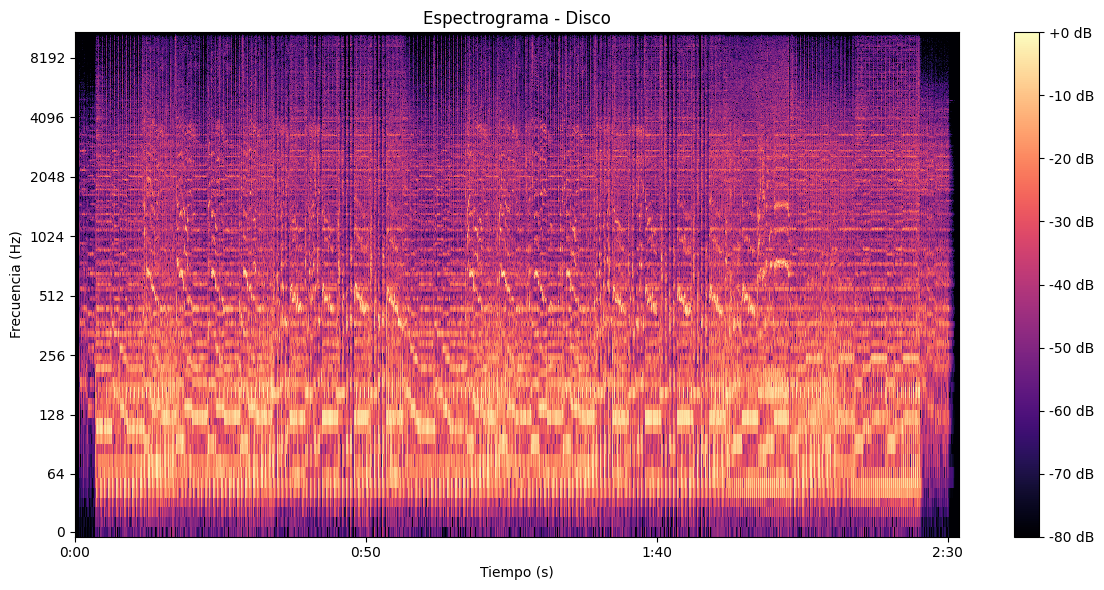

In [22]:

plt.figure(figsize=(12, 6))
librosa.display.specshow(S2_db, sr=sr2, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma - Disco')
plt.xlabel("Tiempo (s)")
plt.ylabel("Frecuencia (Hz)")
plt.tight_layout()
plt.savefig("espectrograma_disco.png")
plt.show()
